In [2]:
import pandas as pd
import os
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

- Leitura da base de dados e configuração

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
PATH_FILE = os.path.join('.//..//data//dados.csv')
df = pd.read_csv(PATH_FILE, sep=';')

- Exploração dos dados

In [6]:
display(df.head())
display(df.info())

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,...,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO
0,1,Site,23,MASCULINO,0.0,18/06/2021,NaN,33,1,48 Meses,...,1,4,0,1,1,2070,450,518,ATIVO,0
1,2,Vendedor,24,FEMININO,0.0,10/04/2018,NaN,1198,39,48 Meses,...,5,0,1,4,0,0,230,265,ATIVO,0
2,3,Site,25,MASCULINO,0.0,09/10/2020,NaN,285,9,48 Meses,...,5,0,3,2,0,0,290,334,ATIVO,0
3,4,Vendedor,26,FEMININO,17.0,25/06/2019,NaN,757,25,48 Meses,...,5,0,1,4,0,0,230,265,ATIVO,0
4,5,Vendedor,27,MASCULINO,0.0,19/09/2019,NaN,671,22,48 Meses,...,5,0,5,0,0,0,230,265,ATIVO,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448447 entries, 0 to 448446
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID_CLIENTE                   448447 non-null  int64  
 1   FORMA_AQUISICAO              448447 non-null  object 
 2   IDADE_CLIENTE                448447 non-null  int64  
 3   SEXO                         448447 non-null  object 
 4   QT_FILHOS                    448193 non-null  float64
 5   DT_AQUISICAO                 448447 non-null  object 
 6   DT_CANCELAMENTO              117455 non-null  object 
 7   DIAS_ATIVO                   448447 non-null  int64  
 8   MESES_ATIVO                  448447 non-null  int64  
 9   DURACAO_CONTRATO             448447 non-null  object 
 10  VL_PLANO_ADESAO              448447 non-null  int64  
 11  VL_PLANO_ATUAL               448447 non-null  int64  
 12  NOME_PRODUTO                 448447 non-null  object 
 13 

None

Análise das variaveis categoricas

- Produtos

In [7]:
display(df.groupby(['NOME_PRODUTO']).size())
display(df['NOME_PRODUTO'].value_counts(normalize=True))

NOME_PRODUTO
PLANO BASICO (30 CANAIS HD)         285209
PLANO BASICO PLUS (50 CANAIS HD)      8835
PLANO FAMILIA (100 CANAIS HD)        59716
PLANO MEDIO A (60 CANAIS HD)         62221
PLANO MEDIO TOP (90 CANAIS HD)         295
PLANO PREMIUM TOTAL                  32171
dtype: int64

NOME_PRODUTO
PLANO BASICO (30 CANAIS HD)         0.635993
PLANO MEDIO A (60 CANAIS HD)        0.138748
PLANO FAMILIA (100 CANAIS HD)       0.133162
PLANO PREMIUM TOTAL                 0.071739
PLANO BASICO PLUS (50 CANAIS HD)    0.019701
PLANO MEDIO TOP (90 CANAIS HD)      0.000658
Name: proportion, dtype: float64

- Sexo

In [8]:
display(df.groupby(['SEXO']).size())
display(df['SEXO'].value_counts(normalize=True))

SEXO
FEMININO     224223
MASCULINO    224224
dtype: int64

SEXO
MASCULINO    0.500001
FEMININO     0.499999
Name: proportion, dtype: float64

- Duração do contrato

In [9]:
display(df.groupby(['DURACAO_CONTRATO']).size())
display(df['DURACAO_CONTRATO'].value_counts(normalize=True))

DURACAO_CONTRATO
12 Meses       195
24 Meses       235
36 Meses     31889
48 Meses    416128
dtype: int64

DURACAO_CONTRATO
48 Meses    0.927931
36 Meses    0.071110
24 Meses    0.000524
12 Meses    0.000435
Name: proportion, dtype: float64

- Forma de aquisição

In [10]:
display(df.groupby(['FORMA_AQUISICAO']).size())
display(df['FORMA_AQUISICAO'].value_counts(normalize=True))

FORMA_AQUISICAO
Site        321376
Vendedor    127071
dtype: int64

FORMA_AQUISICAO
Site        0.716642
Vendedor    0.283358
Name: proportion, dtype: float64

- Situação do cliente

In [11]:
display(df.groupby(['SITUACAO']).size())
display(df['SITUACAO'].value_counts(normalize=True))

SITUACAO
ATIVO        330992
CANCELADO    117455
dtype: int64

SITUACAO
ATIVO        0.738085
CANCELADO    0.261915
Name: proportion, dtype: float64

Grafico de cancelamento por tempo de contrato

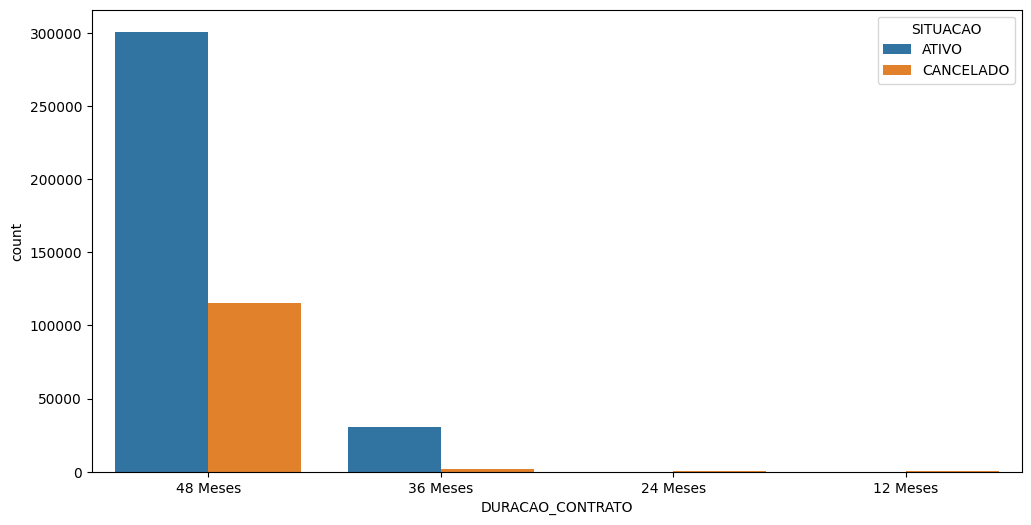

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='DURACAO_CONTRATO', hue='SITUACAO');

Grafico cancelamento por tipo de plano

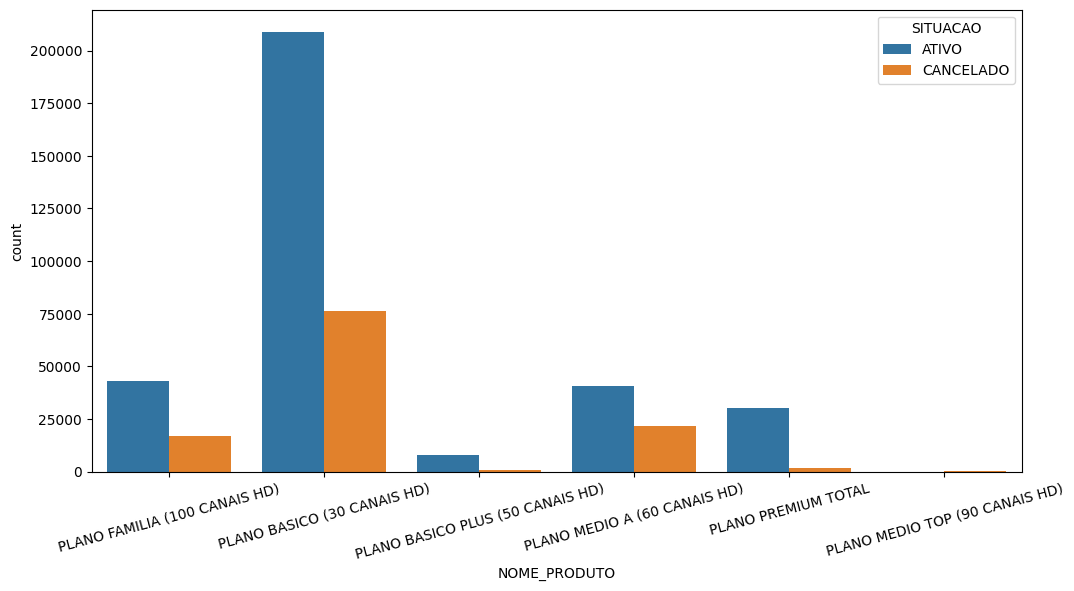

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='NOME_PRODUTO', hue='SITUACAO')
plt.xticks(rotation=15);

Valor da parcela e situação do cliente

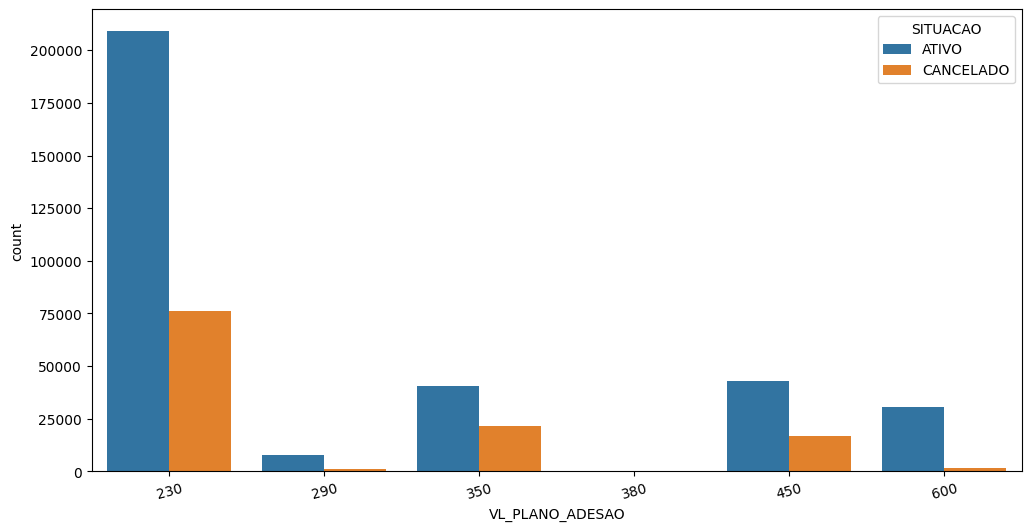

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='VL_PLANO_ADESAO', hue='SITUACAO')
plt.xticks(rotation=15);

Modelo KNN

- Label encoder

In [16]:
encoder = LabelEncoder()

In [21]:
data_model = df[['NOME_PRODUTO', 'SEXO', 'DURACAO_CONTRATO', 'VL_PLANO_ADESAO', 'SITUACAO']]

In [22]:
 data_model['NOME_PRODUTO']  = encoder.fit_transform(data_model['NOME_PRODUTO'] )
data_model['SEXO'] =  encoder.fit_transform(data_model['SEXO'] )
data_model['DURACAO_CONTRATO'] =  encoder.fit_transform(data_model['DURACAO_CONTRATO'] )
data_model['SITUACAO'] =  encoder.fit_transform(data_model['SITUACAO'] )

In [31]:
data_model.isnull().sum()

NOME_PRODUTO        0
SEXO                0
DURACAO_CONTRATO    0
VL_PLANO_ADESAO     0
SITUACAO            0
dtype: int64

- Separando as variaveis do modelo

In [28]:
X = data_model.iloc[:, data_model.columns != 'SITUACAO']
Y = data_model['SITUACAO']

- Treino e teste

In [30]:
x_train,x_target,y_train,y_target = train_test_split(X, Y, test_size=0.15)

- Aplicando o modelo

In [38]:
model_knn = KNeighborsClassifier(n_neighbors=25)

In [39]:
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=25)

- Avaliação do modelo KNN

In [37]:
model_knn.score(x_target, y_target)

0.7382856633168817

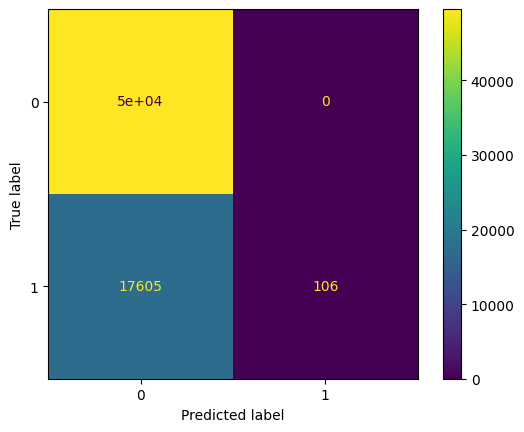

In [53]:
ConfusionMatrixDisplay.from_estimator(model_knn, x_target, y_target);

Aplicando o modelo floresta aleatoria

In [45]:
model_rfc = RandomForestClassifier(n_estimators=400)

In [46]:
model_rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=400)

- Avaliação

In [47]:
model_rfc.score(x_target, y_target)

0.7383153951358744

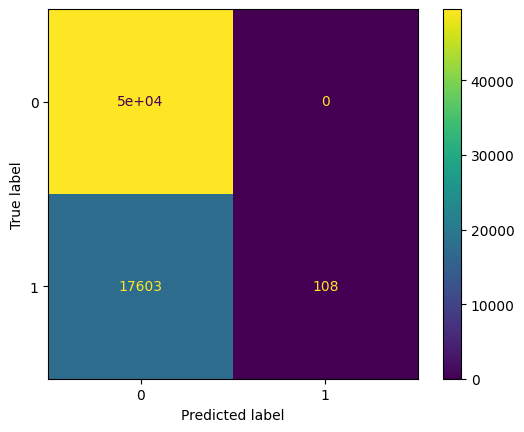

In [51]:
ConfusionMatrixDisplay.from_estimator(model_rfc, x_target, y_target);